In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from config import *

FEA_DIR = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/GreedyNonScale"
# FEA_DIR = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/GreedyNonScaleV1"
NUM_CLASSES=3
# VIDEO_TYPES=["w", "1", "N_L"]
# VIDEO_TYPES=["w", "1", "R_S", "A_S"]
# VIDEO_TYPES=["p", "1", "N_L"]
# VIDEO_TYPES=["p", "1", "R_S"]
# drop_p = ["24071617_AD", "24071721_AD", "24070906_AD", "24070907_AD", "24071618_AD", "24070901_AD", "24071512_AD"]
# drop_p = ["24071617_AD", "24082905_AD", "24070901_AD", "24071619_AD"]
drop_p = DROP_LIST

# Prepare Data

In [2]:
people_list = os.listdir(FEA_DIR)
people_list = list(filter(lambda x: "." not in x, people_list))

In [3]:
people_fea = {}
for _p in people_list:
    if _p in drop_p: continue
    try:
        people_fea[_p] = pd.read_csv(os.path.join(f"{FEA_DIR}/{_p}", "featuresNew.csv"), index_col=0)
    except:
        people_fea[_p] = pd.read_csv(os.path.join(f"{FEA_DIR}/{_p}", "features.csv"), index_col=0)


In [4]:
people_stat = pd.read_excel(os.path.join(DATA_DIR, "ParticipantsInfo.xlsx"), )
people_stat["drop"] = people_stat["PicoFile"].map(lambda x: x in DROP_LIST)
people_stat.drop(people_stat[people_stat["drop"]].index, inplace = True)
print(people_stat.shape)
people_stat

(40, 18)


,Label,No.,Name,Gender,Age,Edu,IsBall,AV45,MMSE,MOCA,ADL,CDR,PicoFile,IsVideo,Contact,ScaleTime,VideoTime,drop
1,HC,24070902,桑秀平,女,64.0,小学,0.0,-,26,19.0,20,-,24070902_AD,1,NaN,NaN,NaN,False
2,HC,24070904,李杏英,女,62.0,小学,0.0,-,29,20.0,20,-,24070904_AD,1,NaN,NaN,NaN,False
3,HC,24070905,朱小汝,女,64.0,初中,1.0,-,28,20.0,20,-,24070905_AD,1,NaN,NaN,NaN,False
4,HC,24070906,宋玉花,女,56.0,初中,0.0,-,28,24.0,20,-,24070906_AD,1,NaN,NaN,NaN,False
5,HC,24070907,刘亚珍,女,60.0,初中,1.0,-,29,23.0,20,-,24070907_AD,1,NaN,NaN,NaN,False
6,HC,24071008,焦秀枝,女,60.0,初中,0.0,-,29,25.0,20,-,24071008_AD,1,NaN,NaN,NaN,False
7,HC,24071009,徐义华,女,64.0,高中,1.0,-,30,24.0,20,-,24071009_AD,1,NaN,NaN,NaN,False
8,HC,24071010,李国锁,男,65.0,初中,0.0,-,26,23.0,20,-,24071010_AD,1,NaN,NaN,NaN,False
9,HC,24071011,董帮春,男,60.0,初中,0.0,-,30,24.0,20,-,24071011_AD,1,NaN,NaN,NaN,False
10,HC,24071512,闫小敏,女,60.0,初中,0.0,-,26,22.0,20,-,24071512_AD,1,NaN,NaN,NaN,False


In [5]:
# whole_fea_list = ["MatchRoundRatio",]
# whole_fea_list = ["Player1AttentionRatio","Player2AttentionRatio","Player1MinToCircle","Player2MinToCircle","MatchRoundRatio",]
# saccade_fea_list = ["SaccadeSpeed_Mean","SaccadeSpeed_Max","SaccadeSpeed_Std","SaccadeAngel_Mean","SaccadeAngel_Max","SaccadeAngel_Std","SaccadeDelay","SaccadeDelayPercent","TrajectoryDTW"]
fea_list = ["MatchRoundRatio","SaccadeSpeed_Mean","SaccadeSpeed_Max","SaccadeSpeed_Std","Amplitude","UnitAmplitude","SaccadeDelay","SaccadeDelayPercent","TrajDTW","TrajDTWPerBallMove","TrajDTWPerEyeMove","DirecAngle"]

In [6]:
#################
# For Version 1 #
#################

""" 
video_type: 
    [] => all
    p => pingpang
    w => tennis
    1 => first watch
    2 => mutiple watch
    N => no label
    R_S => random shining
    A_S => all shining
    R_A => random arrow
    A_A => all arrow
""" 
def StatsFeatures_V1(all_people_fea:dict, all_people_stat:pd.DataFrame, fea_list:list, video_types:list[str], num_classes=3):
    if num_classes==3:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        }
    else:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 1,
            "moderateAD" : 1,
        } 

    res={}
    for _p in all_people_fea.keys():
        video_list = all_people_fea[_p].index.to_list()
        _label_video_list = []
        for _v_t in video_types:
            if _v_t=="p":
                _v_ids = list(filter(lambda x:x.startswith("p"), all_people_fea[_p].index))
            elif _v_t=="w":
                _v_ids = list(filter(lambda x:x.startswith("w"), all_people_fea[_p].index))
            elif _v_t=="1":
                _v_ids = list(filter(lambda x: not ((x.split("-")[0].endswith("_2")) or (x.split("-")[0].endswith("_3")) or (x.split("-")[0].endswith("_4"))), all_people_fea[_p].index))
            elif _v_t=="2":
                _v_ids = list(filter(lambda x: (x.split("-")[0].endswith("_2")) or (x.split("-")[0].endswith("_3")) or (x.split("-")[0].endswith("_4")), all_people_fea[_p].index))
            elif _v_t=="N_L":
                _v_ids = list(filter(lambda x: not (("_S" in x.split("-")[0]) or ("_A" in x.split("-")[0])), all_people_fea[_p].index))
            elif _v_t=="R_S":
                _label_video_list += list(filter(lambda x: "R_S" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="A_S":
                _label_video_list += list(filter(lambda x: "A_S" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="R_A":
                _label_video_list += list(filter(lambda x: "R_A" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="A_A":
                _label_video_list += list(filter(lambda x: "A_A" in x.split("-")[0], all_people_fea[_p].index))
            else:
                _v_ids = list(all_people_fea[_p].index)
            
            video_list = list(set(video_list).intersection(set(_v_ids)))
        if _label_video_list:
            video_list = list(set(video_list).intersection(set(_label_video_list)))
            
        # print(_p)
        # print(video_list)
        # print(len(video_list))
        # print(set([i.split("-")[0] for i in video_list]))
        # print(len(set([i.split("-")[0] for i in video_list])))
        # print(set(["_".join(i.split("_")[:-3]) for i in video_list]))
        # print(len(set(["_".join(i.split("_")[:-3]) for i in video_list])))

        temp_df:pd.DataFrame = all_people_fea[_p].loc[video_list, fea_list]
        mean_val = temp_df.mean(skipna=True)
        mean_val.index = [i+"_Mean" for i in mean_val.index]
        std_val = temp_df.std(skipna=True)
        std_val.index = [i+"_Std" for i in std_val.index]
        max_val = temp_df.max(skipna=True)
        max_val.index = [i+"_Max" for i in max_val.index]
        min_val = temp_df.min(skipna=True)
        min_val.index = [i+"_Min" for i in min_val.index]
        
        try:
            _diag = all_people_stat[all_people_stat["PicoFile"]==_p]["Label"].values[0]
        except:
            continue
        else:
            res[_p] = {
                **mean_val.to_dict(),
                **std_val.to_dict(),
                **max_val.to_dict(),
                **min_val.to_dict(),
            }
            res[_p]["label"] = diag_map[_diag]

    res = pd.DataFrame(res).T.astype(np.float32)
    if num_classes==3:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"MCI",
            2:"Mild-AD",
        })
    else:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"PS",
        })
        
    return res

In [7]:
# features_df = StatsFeatures_V1(
#         all_people_fea=people_fea,
#         all_people_stat=people_stat,
#         fea_list=whole_fea_list+saccade_fea_list,
#         video_types=["w", "1", "R_S", "A_S"],
#         num_classes=NUM_CLASSES
#     )

In [8]:
def StatsFeatures(all_people_fea:dict, all_people_stat:pd.DataFrame, fea_list:list, session:list=[0], ball:str="p", number:str="all", stimul_type:str="all" ,twice=0, num_classes=3):
    assert (number in ["f", "b", "all"]), "input number like \"f\" first 2, \"b\" last 2, \"all\" all number"
    if num_classes==3:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        }
    else:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 1,
            "moderateAD" : 1,
        } 

    res={}
    for _p in all_people_fea.keys():
        video_list = list(filter(lambda x:x.startswith(ball), all_people_fea[_p].index))

        _session_list = []
        for _v_s in session:
            _v_ids = list(filter(lambda x: x.split("-")[0].split("_")[-3]==str(_v_s), all_people_fea[_p].index))
            _session_list = list(set(_session_list).union(set(_v_ids)))
        video_list = list(set(video_list).intersection(set(_session_list)))

        _number_list = []
        if number=="f":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="0") or (x.split("-")[0].split("_")[-2]=="1"), all_people_fea[_p].index))
        elif number=="b":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="2") or (x.split("-")[0].split("_")[-2]=="3"), all_people_fea[_p].index))
        else:
            _number_list = video_list
        video_list = list(set(video_list).intersection(set(_number_list)))

        _stimul_list = []
        if stimul_type=="r":
            _stimul_list = list(filter(lambda x: ("R_A" in x.split("-")[0]) or ("R_S" in x.split("-")[0]), all_people_fea[_p].index))
        elif stimul_type=="a":
            _stimul_list = list(filter(lambda x: ("A_A" in x.split("-")[0]) or ("A_S" in x.split("-")[0]), all_people_fea[_p].index))
        else:
            _stimul_list = video_list
        video_list = list(set(video_list).intersection(set(_stimul_list)))

        __multi_list = []
        if twice==2:
            __multi_list = list(filter(lambda x: not x.split("-")[0].endswith("_1"), video_list))
        elif twice==1:
            __multi_list = list(filter(lambda x: x.split("-")[0].endswith("_1"), video_list))
        else:
            __multi_list = video_list
        video_list = list(set(video_list).intersection(set(__multi_list)))
            
        # print(_p)
        # print(video_list)
        # print(len(video_list))
        # print(set(["_".join(i.split("_")[:-3]) for i in video_list]))
        # print(len(set(["_".join(i.split("_")[:-3]) for i in video_list])))

        temp_df:pd.DataFrame = all_people_fea[_p].loc[video_list, fea_list]
        mean_val = temp_df.mean(skipna=True)
        mean_val.index = [i+"_Mean" for i in mean_val.index]
        std_val = temp_df.std(skipna=True)
        std_val.index = [i+"_Std" for i in std_val.index]
        max_val = temp_df.max(skipna=True)
        max_val.index = [i+"_Max" for i in max_val.index]
        min_val = temp_df.min(skipna=True)
        min_val.index = [i+"_Min" for i in min_val.index]
        
        try:
            _diag = all_people_stat[all_people_stat["PicoFile"]==_p]["Label"].values[0]
        except:
            continue
        else:
            if not _diag=="-":
                res[_p] = {
                    **mean_val.to_dict(),
                    **std_val.to_dict(),
                    **max_val.to_dict(),
                    **min_val.to_dict(),
                }
                res[_p]["label"] = diag_map[_diag]

    res = pd.DataFrame(res).T.astype(np.float32)
    if num_classes==3:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"MCI",
            2:"MMAD",
        })
    else:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"PS",
        })
        
    return res

In [9]:
features_df = StatsFeatures(
        all_people_fea=people_fea,
        all_people_stat=people_stat,
        fea_list=fea_list,
        session=[1],
        ball="w",
        number="all",
        stimul_type="a",
        twice=0,
        num_classes=NUM_CLASSES
    )

{'w18_A_S', 'w13_A_S', 'w8_A_S', 'w17_A_S'}
4
{'w12_A_S', 'w17_A_S', 'w18_A_S', 'w14_A_S'}
4
{'w15_A_S', 'w21_A_S', 'w6_A_S'}
3
{'w12_A_S', 'w20_A_S', 'w18_A_S', 'w17_A_S'}
4
{'w12_A_S', 'w20_A_S', 'w22_A_S', 'w17_A_S'}
4
{'w15_A_S', 'w6_A_S'}
2
{'w12_A_S', 'w22_A_S', 'w21_A_S'}
3
{'w20_A_S', 'w22_A_S', 'w13_A_S', 'w14_A_S'}
4
{'w18_A_S', 'w10_A_S', 'w15_A_S', 'w14_A_S'}
4
{'w18_A_S', 'w20_A_S', 'w8_A_S', 'w22_A_S'}
4
{'w18_A_S', 'w16_A_S', 'w20_A_S', 'w15_A_S'}
4
{'w10_A_S', 'w6_A_S'}
2
{'w10_A_S', 'w20_A_S', 'w8_A_S', 'w15_A_S'}
4
{'w17_A_S', 'w20_A_S', 'w8_A_S', 'w18_A_S'}
4
{'w17_A_S', 'w21_A_S', 'w8_A_S', 'w6_A_S'}
4
{'w17_A_S', 'w16_A_S', 'w21_A_S', 'w13_A_S'}
4
{'w17_A_S', 'w16_A_S', 'w18_A_S'}
3
{'w10_A_S', 'w20_A_S', 'w8_A_S', 'w14_A_S'}
4
{'w18_A_S', 'w10_A_S', 'w20_A_S', 'w8_A_S'}
4
{'w21_A_S', 'w13_A_S', 'w8_A_S', 'w14_A_S'}
4
{'w10_A_S', 'w22_A_S', 'w13_A_S', 'w15_A_S'}
4
{'w21_A_S', 'w8_A_S', 'w15_A_S'}
3
{'w18_A_S', 'w10_A_S', 'w20_A_S', 'w13_A_S'}
4
{'w17_A_S', 'w20_A_S

In [10]:
features_df

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,Amplitude_Mean,UnitAmplitude_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajDTW_Mean,TrajDTWPerBallMove_Mean,...,Amplitude_Min,UnitAmplitude_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajDTW_Min,TrajDTWPerBallMove_Min,TrajDTWPerEyeMove_Min,DirecAngle_Min,label,diag
24071616_AD,0.879397,138.395645,278.595978,90.346794,9.057963,0.532483,868.936157,12.916470,1.091490,1.876827,...,3.422475,0.161050,80.0,0.761905,0.422944,0.899084,2.327802,0.576568,0.0,HC
24090310_AD,0.726935,123.512085,239.030655,77.706589,7.472880,0.453344,912.653076,13.972407,1.149760,1.999495,...,2.156312,0.118249,140.0,1.308411,0.214867,0.684636,1.832783,0.503085,1.0,MCI
24071008_AD,0.873206,218.687790,388.465027,105.627190,11.252045,0.625751,1309.361694,18.185108,1.138084,2.121304,...,3.634669,0.202941,480.0,7.786885,0.278521,0.698874,0.734262,0.701550,0.0,HC
24082906_AD,0.363231,273.328278,515.965881,138.460220,11.155094,0.526384,1100.800049,15.583486,1.309482,1.951471,...,3.858816,0.120328,500.0,3.906250,0.429545,0.896740,1.642440,2.904406,2.0,MMAD
24082803_AD,0.770901,141.320572,273.941132,87.820847,9.035342,0.438226,933.599976,13.529367,1.303476,2.217947,...,4.132051,0.129739,0.0,0.000000,0.563677,1.041569,2.623055,0.407262,1.0,MCI
24072023_AD,0.785985,145.227570,281.405945,92.563873,8.591646,0.501954,1185.405396,15.748501,1.213209,2.231333,...,3.501068,0.137219,520.0,5.081967,0.278443,0.931804,1.992531,0.195981,0.0,HC
24090311_AD,0.658600,128.037674,257.666870,86.194542,8.295003,0.431132,1097.142822,17.047033,1.206140,2.136177,...,3.293246,0.185126,0.0,0.000000,0.393562,0.821620,1.226279,1.761429,1.0,MCI
24071009_AD,0.873918,207.586411,406.571014,117.870056,11.900876,0.707968,1031.724121,15.292474,1.243374,1.975802,...,3.723644,0.199958,440.0,7.096774,0.454474,0.743780,1.426440,0.333446,0.0,HC
24091023_AD,0.346929,232.363190,427.514771,79.153427,9.134761,0.592006,1232.631592,17.378042,1.745718,3.174599,...,1.916189,0.125979,80.0,0.747664,0.509433,1.220931,2.249251,1.002811,2.0,MMAD
24090914_AD,0.603626,224.157791,550.409790,160.564575,15.284809,0.675325,1184.736816,16.171370,1.725127,2.751525,...,4.118925,0.180571,0.0,0.000000,0.528589,0.674414,1.514776,0.017054,2.0,MMAD


In [11]:
# StatsFeatures(
#         all_people_fea=people_fea,
#         all_people_stat=people_stat,
#         fea_list=fea_list,
#         session=[0],
#         ball="p",
#         number="f",
#         twice=0,
#         num_classes=NUM_CLASSES
#     )

# Features Statastic

In [12]:
from scipy.stats import shapiro

if_norm = {}
for key in features_df.columns:
    if key=="diag" or key=="label": continue
    SW_test = shapiro(features_df.loc[:,key])[1]
    # print("Group {}'s \tShapiro—Wilk test P-Value: \t{}".format(key,SW_test))
    if_norm[key] = (True if SW_test >0.05 else False)

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu, wilcoxon, f_oneway, kruskal

def TTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    t_statistic, p_value = ttest_ind(group1, group2)
    return p_value


def UTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    u_statistic, p_value = mannwhitneyu(group1, group2)
    return p_value


def AnovaTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])
    u_statistic, p_value = f_oneway(*groups)
    return p_value

def KWTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])

    u_statistic, p_value = kruskal(*groups)
    return p_value

In [14]:
para_pvalue = {}

if features_df["label"].value_counts().shape[0]==2:
    for key in features_df.columns:
        if key=="diag" or key=="label": continue
        if if_norm[key]:
            p_value = TTest(features_df, key, label_col='label')
        else:
            p_value = UTest(features_df, key, label_col='label')
        para_pvalue[key] = {
            "p-value": p_value,
            "if_para": True if p_value <= 0.05 else False
        }
else:
    for key in features_df.columns:
        if key=="diag" or key=="label": continue
        if if_norm[key]:
            p_value = AnovaTest(features_df, key, label_col='label')
        else:
            p_value = KWTest(features_df, key, label_col='label')
        para_pvalue[key] = {
            "p-value": p_value,
            "if_para": True if p_value <= 0.05 else False
        }

In [15]:
pt_res = pd.DataFrame(para_pvalue).T.sort_values(by="p-value")

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

custom_palette = ["#00712D", "#FF9100", "#D5ED9F", "#FFFBE6"]
if not os.path.exists("pics"):
    os.mkdir("pics")

In [17]:
features_df[features_df["diag"]=="HC"]

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,Amplitude_Mean,UnitAmplitude_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajDTW_Mean,TrajDTWPerBallMove_Mean,...,Amplitude_Min,UnitAmplitude_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajDTW_Min,TrajDTWPerBallMove_Min,TrajDTWPerEyeMove_Min,DirecAngle_Min,label,diag
24071616_AD,0.879397,138.395645,278.595978,90.346794,9.057963,0.532483,868.936157,12.916470,1.091490,1.876827,...,3.422475,0.161050,80.0,0.761905,0.422944,0.899084,2.327802,0.576568,0.0,HC
24071008_AD,0.873206,218.687790,388.465027,105.627190,11.252045,0.625751,1309.361694,18.185108,1.138084,2.121304,...,3.634669,0.202941,480.0,7.786885,0.278521,0.698874,0.734262,0.701550,0.0,HC
24072023_AD,0.785985,145.227570,281.405945,92.563873,8.591646,0.501954,1185.405396,15.748501,1.213209,2.231333,...,3.501068,0.137219,520.0,5.081967,0.278443,0.931804,1.992531,0.195981,0.0,HC
24071009_AD,0.873918,207.586411,406.571014,117.870056,11.900876,0.707968,1031.724121,15.292474,1.243374,1.975802,...,3.723644,0.199958,440.0,7.096774,0.454474,0.743780,1.426440,0.333446,0.0,HC
24071618_AD,0.676069,279.081421,430.050720,101.202477,12.741091,0.726127,907.659546,13.732787,1.298490,2.319854,...,3.292188,0.221501,280.0,2.295082,0.379387,0.708096,0.866706,0.420151,0.0,HC
24070905_AD,0.791667,249.396103,475.973145,131.965378,13.115152,0.913882,1196.315796,17.362728,0.875899,1.580998,...,1.688363,0.104360,740.0,8.080808,0.189864,0.656553,1.238337,0.385533,0.0,HC
24072825_AD,0.898639,149.893616,302.164276,103.147728,9.161380,0.527050,932.413818,14.112918,1.134382,2.000027,...,3.839828,0.218024,260.0,3.130435,0.249797,0.922792,1.548741,0.295854,0.0,HC
24070904_AD,0.848214,141.179092,288.713226,99.027222,8.804606,0.537229,1051.636353,16.490707,1.084223,2.044060,...,3.001467,0.207482,680.0,7.238095,0.378814,0.806171,1.774660,0.092407,0.0,HC
24070907_AD,0.788349,215.078079,357.024689,106.055641,10.761974,0.552361,1160.416626,17.303968,1.220986,2.086080,...,3.941240,0.225779,180.0,2.307692,0.416304,0.593232,1.020977,0.498963,0.0,HC
24071010_AD,0.786255,187.414581,361.208221,120.616112,12.749834,0.809662,1013.684204,14.035261,1.192295,1.992675,...,4.153352,0.242360,560.0,7.294117,0.410438,0.774098,1.576158,0.048757,0.0,HC


In [18]:
features_df[features_df["diag"]=="MCI"]

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,Amplitude_Mean,UnitAmplitude_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajDTW_Mean,TrajDTWPerBallMove_Mean,...,Amplitude_Min,UnitAmplitude_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajDTW_Min,TrajDTWPerBallMove_Min,TrajDTWPerEyeMove_Min,DirecAngle_Min,label,diag
24090310_AD,0.726935,123.512085,239.030655,77.706589,7.472880,0.453344,912.653076,13.972407,1.149760,1.999495,...,2.156312,0.118249,140.0,1.308411,0.214867,0.684636,1.832783,0.503085,1.0,MCI
24082803_AD,0.770901,141.320572,273.941132,87.820847,9.035342,0.438226,933.599976,13.529367,1.303476,2.217947,...,4.132051,0.129739,0.0,0.000000,0.563677,1.041569,2.623055,0.407262,1.0,MCI
24090311_AD,0.658600,128.037674,257.666870,86.194542,8.295003,0.431132,1097.142822,17.047033,1.206140,2.136177,...,3.293246,0.185126,0.0,0.000000,0.393562,0.821620,1.226279,1.761429,1.0,MCI
24082302_AD,0.787879,161.856781,353.569763,113.790474,9.047867,0.515982,940.869568,14.101700,1.318612,2.444922,...,3.049483,0.138325,60.0,0.857143,0.196520,0.875501,1.726311,0.150263,1.0,MCI
24090915_AD,0.654605,207.887848,300.401154,67.220848,8.088306,0.449538,996.111084,13.381930,1.406496,2.384050,...,3.985938,0.163094,220.0,2.933333,0.494128,0.835892,1.733687,0.716343,1.0,MCI
24090308_AD,0.496810,250.452301,466.873962,134.919662,12.688640,0.657188,1017.857117,13.986754,1.374216,2.492393,...,4.634717,0.188125,180.0,2.571429,0.506476,1.132672,2.553680,1.474299,1.0,MCI
24090309_AD,0.752976,165.114838,427.478394,137.655319,11.943972,0.717733,1150.731689,16.809347,1.053577,2.020819,...,3.340233,0.178627,120.0,1.518987,0.441346,0.728027,1.154582,0.395867,1.0,MCI
24091020_AD,0.702381,163.878052,303.208923,89.718742,7.944970,0.478055,998.367371,15.067182,1.115394,1.961300,...,2.072867,0.131812,480.0,5.925926,0.297224,0.891519,1.797968,1.005415,1.0,MCI
24090917_AD,0.764265,206.657242,422.865967,126.328430,11.944071,0.758978,1165.490234,17.649458,1.103460,2.138715,...,3.364639,0.117263,140.0,2.413793,0.442215,1.011775,1.228260,0.183013,1.0,MCI
24090513_AD,0.714959,157.670700,491.501343,153.990692,12.840466,0.627176,983.599976,15.014200,1.406169,2.415061,...,3.901439,0.181960,260.0,4.727273,0.424051,0.877918,1.955882,0.996862,1.0,MCI


In [19]:
features_df[features_df["diag"]=="MMAD"]

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,Amplitude_Mean,UnitAmplitude_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajDTW_Mean,TrajDTWPerBallMove_Mean,...,Amplitude_Min,UnitAmplitude_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajDTW_Min,TrajDTWPerBallMove_Min,TrajDTWPerEyeMove_Min,DirecAngle_Min,label,diag
24082906_AD,0.363231,273.328278,515.965881,138.460220,11.155094,0.526384,1100.800049,15.583486,1.309482,1.951471,...,3.858816,0.120328,500.0,3.906250,0.429545,0.896740,1.642440,2.904406,2.0,MMAD
24091023_AD,0.346929,232.363190,427.514771,79.153427,9.134761,0.592006,1232.631592,17.378042,1.745718,3.174599,...,1.916189,0.125979,80.0,0.747664,0.509433,1.220931,2.249251,1.002811,2.0,MMAD
24090914_AD,0.603626,224.157791,550.409790,160.564575,15.284809,0.675325,1184.736816,16.171370,1.725127,2.751525,...,4.118925,0.180571,0.0,0.000000,0.528589,0.674414,1.514776,0.017054,2.0,MMAD
24091022_AD,0.690070,324.190033,512.408264,128.541214,14.691016,0.806687,1183.478271,18.232859,1.521025,2.376799,...,5.789307,0.259907,200.0,2.666667,0.669312,0.960961,1.970939,0.679504,2.0,MMAD
24091021_AD,0.567370,159.211594,392.555115,114.242020,12.190989,0.694335,1230.270264,17.357193,1.324303,2.280297,...,3.215231,0.162912,0.0,0.000000,0.382172,0.866127,1.187268,1.380750,2.0,MMAD
24090916_AD,0.678504,217.190384,457.248871,150.352280,12.015344,0.631115,1041.818237,16.016674,1.335662,2.236498,...,2.070571,0.063145,320.0,6.099291,0.369664,0.944421,1.191072,0.379166,2.0,MMAD
24090412_AD,0.559930,173.075455,335.051819,91.533974,9.106884,0.491535,967.096802,14.090491,1.334075,2.246040,...,1.159512,0.111033,200.0,2.500000,0.553922,1.285817,2.300217,0.377272,2.0,MMAD
24082301_AD,0.464912,325.673767,558.257263,128.542618,13.446503,1.073467,1106.923096,16.695368,1.144003,2.156800,...,3.810708,0.237355,240.0,3.750000,0.407952,0.890689,1.031412,3.179454,2.0,MMAD
24083007_AD,0.584280,122.817223,379.317108,137.088165,9.731272,0.542803,1228.387085,18.765631,1.393785,2.622373,...,3.810142,0.201450,360.0,4.631579,0.484345,1.115340,1.498841,0.203870,2.0,MMAD
24082904_AD,0.779449,203.092560,440.653748,138.633942,13.118788,1.186573,1113.846191,17.661726,1.066775,2.023104,...,4.089294,0.258678,440.0,6.567164,0.323953,0.633514,0.890789,1.927038,2.0,MMAD


In [20]:
pt_res

,p-value,if_para
MatchRoundRatio_Mean,0.000021,True
MatchRoundRatio_Min,0.000108,True
TrajDTWPerEyeMove_Std,0.002039,True
DirecAngle_Mean,0.002055,True
MatchRoundRatio_Max,0.002076,True
TrajDTW_Mean,0.002921,True
SaccadeDelayPercent_Std,0.002939,True
TrajDTW_Min,0.003428,True
TrajDTWPerBallMove_Mean,0.010987,True
SaccadeDelay_Mean,0.016212,True


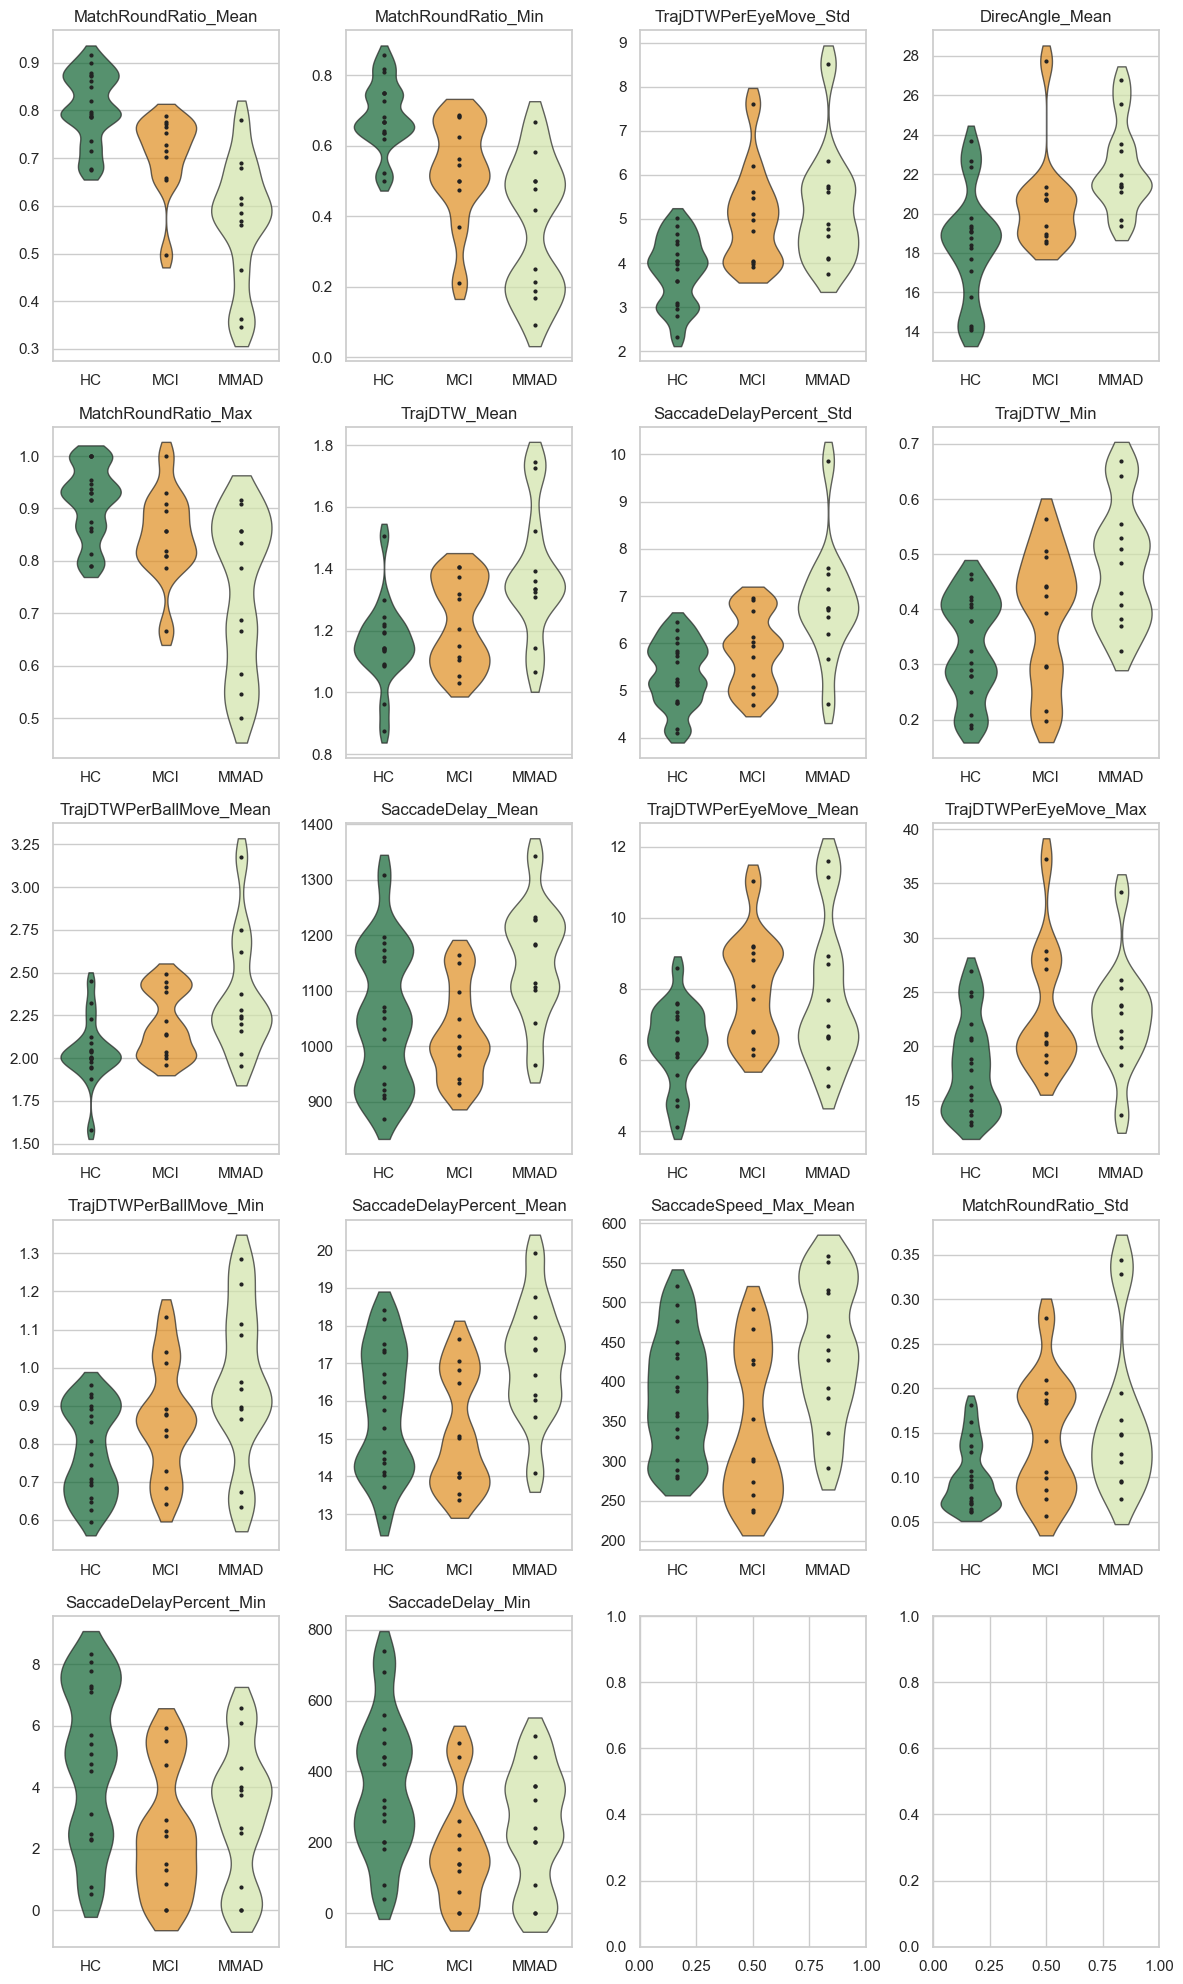

In [21]:
pass_feas = pt_res[pt_res["if_para"]]
_ncols = 4 
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    try:
        temp_ax = axs[idx//_ncols, idx%_ncols]
    except:
        temp_ax = axs[idx%_ncols]

    sns.violinplot(
            data=features_df.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    # sns.boxplot(
    #         data=features_df.loc[:, [col, "diag"]], 
    #         palette=custom_palette,
    #         linewidth=1, 
    #         x="diag", 
    #         y=col, 
    #         ax=temp_ax
    #     )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

# plt.savefig("pics/sig_features_{}_{}.png".format("_".join(VIDEO_TYPES), NUM_CLASSES), dpi=200)

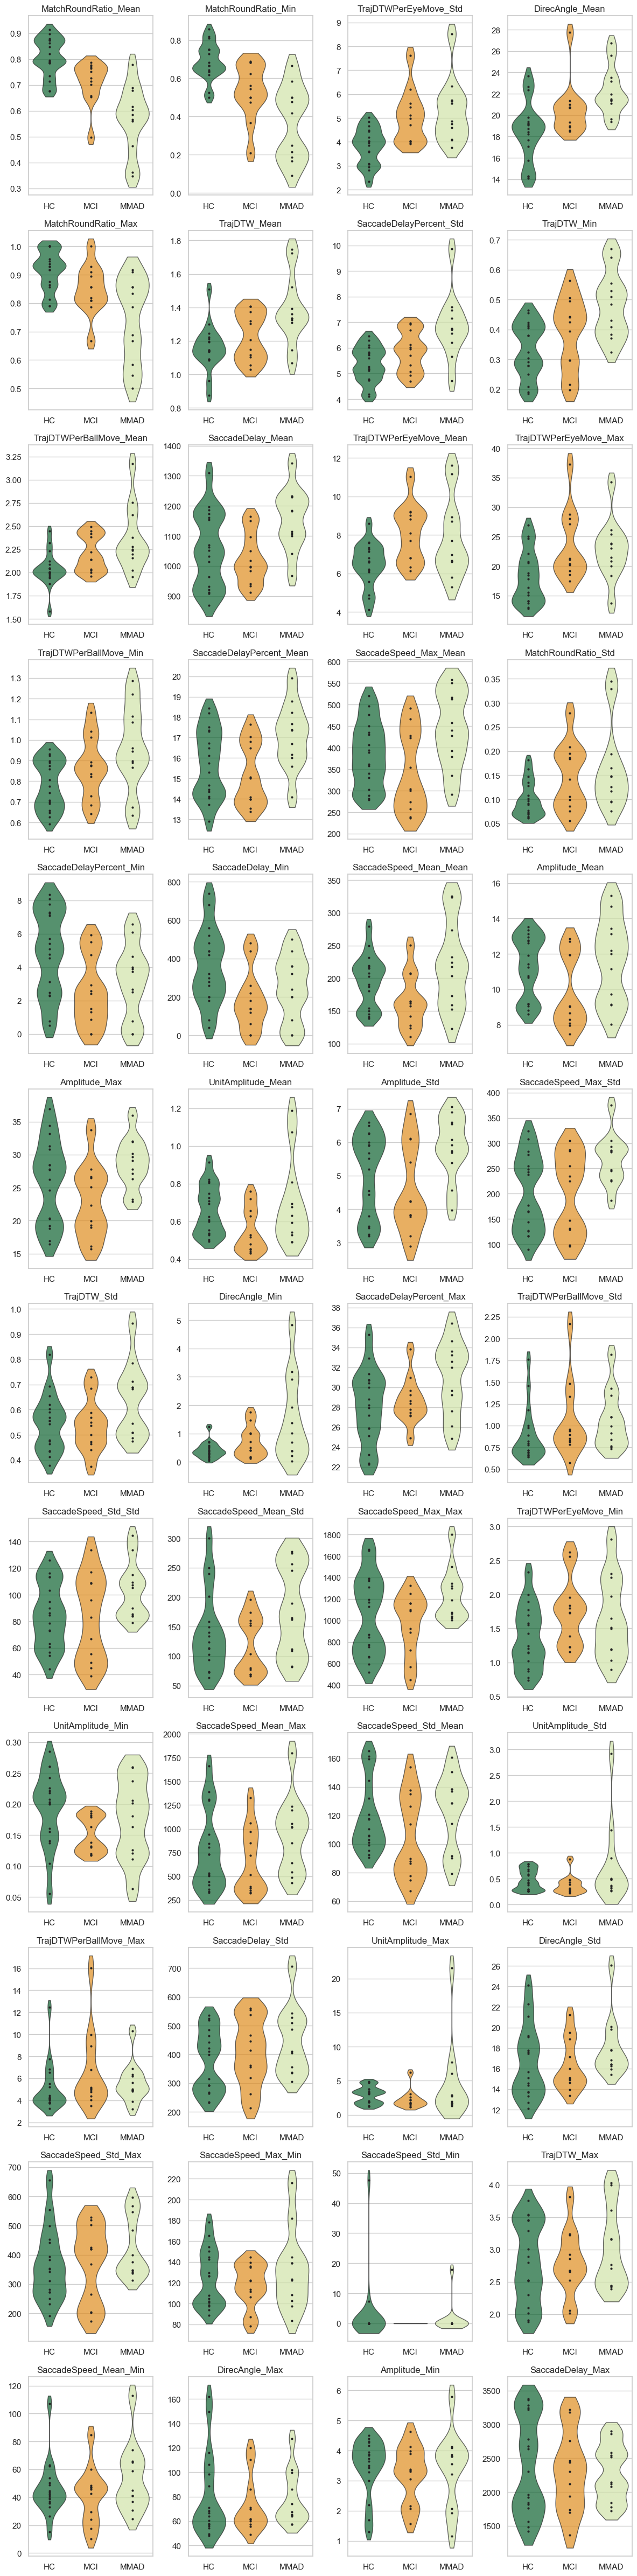

In [22]:
pass_feas = pt_res
_ncols = 4
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    temp_ax = axs[idx//_ncols, idx%_ncols]
    sns.violinplot(
            data=features_df.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    # sns.boxplot(
    #         data=features_df.loc[:, [col, "diag"]], 
    #         palette=custom_palette,
    #         linewidth=1, 
    #         x="diag", 
    #         y=col, 
    #         ax=temp_ax
    #     )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

# plt.savefig("pics/features_{}_{}.png".format("_".join(VIDEO_TYPES), NUM_CLASSES), dpi=200)

# Machine Learning

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, auc, roc_curve
from lightgbm import LGBMClassifier


data_indices = features_df.index.to_list()
fea_list = pt_res[pt_res["if_para"]].index.to_list()
final_result = {}

rkf = RepeatedKFold(n_splits=5, n_repeats=10)
X = features_df[fea_list]
y = features_df['label']

## GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
        'n_estimators':[5,10,15,20,25,30],
        'max_depth':[3, 5]
    }
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 3, 'n_estimators': 10}
0.6928571428571428


In [25]:
parameters = {
    'n_estimators':[5,10,15,20,25,30],
    'learning_rate':[0.9,0.8,0.75,0.7]
    }
ada = AdaBoostClassifier()
clf = GridSearchCV(ada, parameters, cv=5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.7, 'n_estimators': 20}
0.6392857142857142


In [26]:
parameters = {
    'n_estimators':[5,10,15,20,25,30],
    'learning_rate':[0.2,0.1,0.05,0.01]
    }
gbt = GradientBoostingClassifier()
clf = GridSearchCV(gbt, parameters, cv=5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)


{'learning_rate': 0.2, 'n_estimators': 30}
0.6964285714285714


In [27]:
parameters = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": [5,10,15,20,25,30, 40, 50]
}
lgb = LGBMClassifier()
clf = GridSearchCV(gbt, parameters, cv=5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 1, 'n_estimators': 25}
0.6928571428571428


## Two Classes

In [28]:
if NUM_CLASSES==2:
    final_result['overall'] = {}
    final_result['overall']['acc'] = []
    final_result['overall']['pre'] = []
    final_result['overall']['recall'] = []
    final_result['overall']['f1'] = []
    final_result['overall']['fpr'] = []
    final_result['overall']['tpr'] = []
    final_result['overall']['thresholds'] = []
    final_result['overall']['auc'] = []
    final_result['overall']['test_index'] = []
    final_result['overall']['trues'] = []
    final_result['overall']['preds'] = []
    final_result['overall']['preds_porb'] = []

    for i, (train_index, test_index) in enumerate(rkf.split(X)):
        final_result['overall']['test_index'].append(test_index.tolist())

        # cls = RandomForestClassifier(20, max_depth=5)
        cls = RandomForestClassifier(n_estimators=20, max_depth=3)
        # cls = AdaBoostClassifier(n_estimators=5, learning_rate=0.75)
        # cls = SVC(C=0.75, kernel='linear')
        # cls = SVC(C=0.75, kernel='rbf')
        x_train, y_train = features_df.iloc[train_index][fea_list], features_df.iloc[train_index]['label']
        x_test, y_test = features_df.iloc[test_index][fea_list], features_df.iloc[test_index]['label']
        cls.fit(X=x_train, y=y_train)

        pred = cls.predict(x_test)
        final_result['overall']['acc'].append(accuracy_score(y_test, pred))
        final_result['overall']['pre'].append(precision_score(y_test, pred))
        final_result['overall']['recall'].append(recall_score(y_test, pred))
        final_result['overall']['f1'].append(f1_score(y_test, pred))
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        final_result['overall']['fpr'].append(fpr)
        final_result['overall']['tpr'].append(tpr)
        final_result['overall']['thresholds'].append(thresholds)
        final_result['overall']['auc'].append(auc(fpr, tpr))

        final_result['overall']['trues'].append(y_test.to_list())
        final_result['overall']['preds'].append(pred.tolist())
        final_result['overall']['preds_porb'].append(cls.predict_proba(x_test).tolist())

In [29]:
if NUM_CLASSES==3:

    final_result['overall'] = {}
    final_result['overall']['acc'] = []
    final_result['overall']['micro_pre'] = []
    final_result['overall']['micro_recall'] = []
    final_result['overall']['micro_f1'] = []
    final_result['overall']['macro_pre'] = []
    final_result['overall']['macro_recall'] = []
    final_result['overall']['macro_f1'] = []
    final_result['overall']['test_index'] = []
    final_result['overall']['trues'] = []
    final_result['overall']['preds'] = []
    final_result['overall']['preds_porb'] = []

    for i, (train_index, test_index) in enumerate(rkf.split(X)):
        final_result['overall']['test_index'].append(test_index.tolist())

        cls = RandomForestClassifier(n_estimators=20, max_depth=3)
        # cls = AdaBoostClassifier(n_estimators=10, learning_rate=0.8)
        # cls = SVC(C=0.75, kernel='linear')
        # cls = SVC(C=0.75, kernel='rbf')
        x_train, y_train = features_df.iloc[train_index][fea_list], features_df.iloc[train_index]['label']
        x_test, y_test = features_df.iloc[test_index][fea_list], features_df.iloc[test_index]['label']
        cls.fit(X=x_train, y=y_train)

        pred = cls.predict(x_test)
        final_result['overall']['acc'].append(accuracy_score(y_test, pred))
        final_result['overall']['micro_pre'].append(precision_score(y_test, pred, average='micro'))
        final_result['overall']['micro_recall'].append(recall_score(y_test, pred, average='micro'))
        final_result['overall']['micro_f1'].append(f1_score(y_test, pred, average='micro'))
        final_result['overall']['macro_pre'].append(precision_score(y_test, pred, average='macro'))
        final_result['overall']['macro_recall'].append(recall_score(y_test, pred, average='macro'))
        final_result['overall']['macro_f1'].append(f1_score(y_test, pred, average='macro'))

        final_result['overall']['trues'].append(y_test.to_list())
        final_result['overall']['preds'].append(pred.tolist())
        final_result['overall']['preds_porb'].append(cls.predict_proba(x_test).tolist())

In [30]:
for key in final_result['overall'].keys():
    if key in ['fpr', 'tpr', 'thresholds', 'test_index', 'trues', 'preds', 'preds_porb']:
        continue
    print(key, np.mean(final_result['overall'][key]))

acc 0.58
micro_pre 0.58
micro_recall 0.58
micro_f1 0.58
macro_pre 0.5416190476190476
macro_recall 0.5460555555555555
macro_f1 0.49519817219817214


In [31]:
errors = []
for idx, test_ids in enumerate(final_result["overall"]["test_index"]):
    _true = final_result["overall"]["trues"][idx]
    _pred = final_result["overall"]["preds"][idx]
    for i, (t, p) in enumerate(zip(_true, _pred)):
        if not t==p:
            errors.append(test_ids[i])
most_error = pd.value_counts(errors).head(7).index.to_list()
pd.value_counts(errors).head(7)

24    10
25    10
33    10
38    10
18     9
21     9
27     9
Name: count, dtype: int64

In [32]:
stat = pd.DataFrame(final_result["overall"])
stat

,acc,micro_pre,micro_recall,micro_f1,macro_pre,macro_recall,macro_f1,test_index,trues,preds,preds_porb
0,0.500000,0.500000,0.500000,0.500000,0.466667,0.500000,0.412698,"[4, 6, 10, 12, 14, 17, 22, 36]","[1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0]","[1.0, 1.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0]","[[0.24545454545454545, 0.43383699633699635, 0...."
1,0.250000,0.250000,0.250000,0.250000,0.400000,0.416667,0.244444,"[9, 13, 25, 27, 29, 30, 33, 38]","[2.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0]","[2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[[0.008571428571428572, 0.4495238095238096, 0...."
2,0.625000,0.625000,0.625000,0.625000,0.333333,0.277778,0.303030,"[2, 7, 11, 19, 24, 26, 34, 35]","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 0.0]","[[0.4924242424242424, 0.3534090909090909, 0.15..."
3,0.625000,0.625000,0.625000,0.625000,0.694444,0.750000,0.585714,"[0, 1, 3, 8, 18, 20, 28, 31]","[0.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0]","[0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0]","[[0.6878708791208791, 0.2913911782661783, 0.02..."
4,0.571429,0.571429,0.571429,0.571429,0.500000,0.533333,0.472222,"[5, 15, 16, 21, 23, 32, 37]","[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0]","[1.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0]","[[0.25887237762237764, 0.5969655344655345, 0.1..."
5,0.500000,0.500000,0.500000,0.500000,0.583333,0.416667,0.419048,"[9, 11, 15, 17, 28, 29, 32, 38]","[2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0]","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0]","[[0.24700091575091573, 0.46043956043956047, 0...."
6,0.625000,0.625000,0.625000,0.625000,0.694444,0.700000,0.611111,"[2, 4, 7, 16, 19, 22, 31, 36]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0]","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0]","[[0.40027777777777784, 0.4914646464646465, 0.1..."
7,0.375000,0.375000,0.375000,0.375000,0.244444,0.555556,0.333333,"[0, 1, 3, 14, 25, 27, 30, 35]","[0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0]","[[0.7466666666666667, 0.1433333333333333, 0.11..."
8,0.500000,0.500000,0.500000,0.500000,0.533333,0.416667,0.444444,"[8, 10, 18, 23, 24, 26, 34, 37]","[2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0]","[2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[[0.00625, 0.24375, 0.75], [0.2027489177489177..."
9,0.285714,0.285714,0.285714,0.285714,0.277778,0.277778,0.277778,"[5, 6, 12, 13, 20, 21, 33]","[0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 2.0]","[1.0, 2.0, 1.0, 1.0, 0.0, 2.0, 0.0]","[[0.45059941520467833, 0.49940058479532157, 0...."


In [33]:
best_acc=0
best_indices = []
for indices in np.array(stat.index).reshape(-1, 5):
    _acc = stat.iloc[indices.tolist(),:]["acc"].mean()
    if _acc > best_acc:
        best_acc = _acc
        best_indices = indices

In [34]:
final_result["overall"] = stat.iloc[best_indices, :].to_dict('list')

{'acc': [0.625, 0.875, 0.375, 0.75, 0.7142857142857143],
 'micro_pre': [0.625, 0.875, 0.375, 0.75, 0.7142857142857143],
 'micro_recall': [0.625, 0.875, 0.375, 0.75, 0.7142857142857143],
 'micro_f1': [0.625, 0.875, 0.375, 0.75, 0.7142857142857143],
 'macro_pre': [0.6,
  0.8888888888888888,
  0.27777777777777773,
  0.5,
  0.7777777777777777],
 'macro_recall': [0.4444444444444444,
  0.9333333333333332,
  0.5,
  0.5833333333333334,
  0.7777777777777777],
 'macro_f1': [0.46296296296296297,
  0.8962962962962964,
  0.3333333333333333,
  0.5357142857142857,
  0.7000000000000001],
 'test_index': [[7, 12, 18, 19, 22, 24, 26, 35],
  [0, 1, 5, 6, 20, 32, 34, 37],
  [13, 14, 15, 25, 27, 28, 31, 38],
  [2, 8, 10, 11, 17, 21, 33, 36],
  [3, 4, 9, 16, 23, 29, 30]],
 'trues': [[0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0],
  [2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0],
  [0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 2.0, 2.0],
  [2.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0]],
 'preds': [[0.0

In [ ]:
for key in final_result['overall'].keys():
    if key in ['fpr', 'tpr', 'thresholds', 'test_index', 'trues', 'preds', 'preds_porb']:
        continue
    print(key, np.mean(final_result['overall'][key]))

In [ ]:
from sklearn.metrics import confusion_matrix

trues = [item for sublist in final_result["overall"]["trues"] for item in sublist]
preds = [item for sublist in final_result["overall"]["preds"] for item in sublist]
if NUM_CLASSES==2:
    preds_prob = [item[1] for sublist in final_result["overall"]["preds_porb"] for item in sublist]
else:
    preds_prob = [item for sublist in final_result["overall"]["preds_porb"] for item in sublist]
f,ax = plt.subplots(figsize=(5,4), dpi=200)
C2 = confusion_matrix(trues, preds, labels=[0,1,2] if NUM_CLASSES==3 else [0,1])
# C2 = C2 / len(trues)
C2 = C2 / C2.sum(axis=0)

sns.heatmap(C2, annot=True, ax=ax, cmap="YlGn", linewidth=.8) 

if NUM_CLASSES==3:
    ax.set_yticklabels(['HC', 'MCI', 'Mild-AD'])
    ax.set_xticklabels(['HC', 'MCI', 'Mild-AD'])
else:
    ax.set_yticklabels(['HC', 'PS'])
    ax.set_xticklabels(['HC', 'PS'])

plt.setp(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')

In [ ]:
from sklearn.metrics import roc_auc_score
if NUM_CLASSES==3:
    print("Macro One-vs-Rest AUC", roc_auc_score(trues, preds_prob, multi_class="ovr", average="macro"))
    print("Weighted One-vs-Rest AUC", roc_auc_score(trues, preds_prob, multi_class="ovr", average="weighted"))
    print("Macro One-vs-One AUC", roc_auc_score(trues, preds_prob, multi_class="ovo", average="macro"))
    print("Weighted One-vs-One AUC", roc_auc_score(trues, preds_prob, multi_class="ovo", average="weighted"))
else:
    print("AUC", roc_auc_score(trues, preds_prob))

In [38]:
trues_np = np.array(trues, dtype=np.int16)
trues_onehot = np.zeros((trues_np.size, trues_np.max() + 1))
trues_onehot[np.arange(trues_np.size), trues_np] = 1

preds_np = np.array(preds, dtype=np.int16)
preds_onehot = np.zeros((preds_np.size, preds_np.max() + 1))
preds_onehot[np.arange(preds_np.size), preds_np] = 1

preds_prob_np = np.array(preds_prob)

In [ ]:
from itertools import cycle
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(trues_onehot[:, i], preds_prob_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(trues_onehot.ravel(), preds_prob_np.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_CLASSES

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9,9), dpi=200)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(NUM_CLASSES), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# Overall Ana

In [40]:
import pandas as pd
import os

def fetch_overall(aim_ana_dir):
    groups_file = list(filter(lambda x: x.endswith(".txt"), os.listdir(aim_ana_dir)))
    res = {}
    for file in groups_file:
        groups_name = file.split(".")[0]
        _res = {}
        with open(os.path.join(aim_ana_dir, file), "r") as f:
            metrics_lines = f.readlines()
        for metrics in metrics_lines:
            _res[metrics.split(" : ")[0]] = metrics.split(" : ")[1][:-1]
        res[groups_name] = _res
    return pd.DataFrame(res, dtype=np.float32).T

In [ ]:
fetch_overall("Ana_2C/ana_output")

In [ ]:
fetch_overall("Ana_3C/ana_output")

# Utils

In [1]:
import pandas as pd
import os

def fetch(ana_dir, name, fea_name):

    sigfea = pd.read_csv(os.path.join(ana_dir, f"{name}_sigfea.csv"), index_col=0)
    fea = pd.read_csv(os.path.join(ana_dir, f"{name}.csv"), index_col=0)

    fea_mean = fea.groupby("diag").mean().T
    fea_mean.columns = [i+"_mean" for i in fea_mean.columns]
    fea_std = fea.groupby("diag").std().T
    fea_std.columns = [i+"_std" for i in fea_std.columns]
    fea_stat = fea_mean.merge(right=fea_std, left_index=True, right_index=True)

    all_fea = fea_stat.merge(right=sigfea, left_index=True, right_index=True)
    row = all_fea.loc[fea_name, :]

    return "{:.2f}({:.2f}) {:.2f}({:.2f}) {:.4f}".format(row["HC_mean"], row["HC_std"], row["PS_mean"], row["PS_std"], row["p-value"])

In [12]:
fetch(
    ana_dir = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/20240912/Ana_2C/ana_output",
    name = "wangqiu_no",
    fea_name = "DirecAngle_Mean"
)

'18.73(1.83) 21.98(2.78) 0.0002'

In [3]:
fetch(
    ana_dir = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/20240912/Ana_2C/ana_output",
    name = "wangqiu_aa",
    fea_name = "MatchRoundRatio_Mean"
)

'0.71(0.12) 0.57(0.18) 0.0053'

In [9]:
ana_dir = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/20240912/Ana_2C/ana_output"
names = [
    # "pingpang_no",
    # "pingpang_ra",
    # "pingpang_rs",
    # "pingpang_aa",
    # "pingpang_as",
    "wangqiu_no",
    "wangqiu_ra",
    "wangqiu_rs",
    "wangqiu_aa",
    "wangqiu_as",
]

fea_list = []
for name in names:
    sigfea = pd.read_csv(os.path.join(ana_dir, f"{name}_sigfea.csv"), index_col=0)
    fea_list += sigfea[sigfea["if_para"]].index.to_list()

In [10]:
import numpy as np

indices = ["Mean", "Std", "Max","Min"]
columns = ["MatchRoundRatio", "Amplitude", "UnitAmplitude", "SaccadeSpeed_Mean", "SaccadeSpeed_Max", "SaccadeSpeed_Std", "SaccadeDelay", "SaccadeDelayPercent", "TrajDTW", "TrajDTWPerEyeMove", "TrajDTWPerBallMove", "DirecAngle"]
fea_count = pd.DataFrame(data=np.zeros((len(indices), len(columns))), index=indices, columns=columns, dtype=str)
for fea, count in pd.value_counts(fea_list).items():
    fea_count.loc[fea.split("_")[-1], "_".join(fea.split("_")[:-1])] = f"{str(count)}"
fea_count.T

/var/folders/rp/3xmh9dds7tl2vhpb6h3ntl1r0000gn/T/ipykernel_27922/1618633132.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  for fea, count in pd.value_counts(fea_list).items():
/var/folders/rp/3xmh9dds7tl2vhpb6h3ntl1r0000gn/T/ipykernel_27922/1618633132.py:6: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for fea, count in pd.value_counts(fea_list).items():


,Mean,Std,Max,Min
MatchRoundRatio,5,1,5,5
Amplitude,0.0,0.0,0.0,1
UnitAmplitude,0.0,0.0,0.0,2
SaccadeSpeed_Mean,0.0,0.0,0.0,0.0
SaccadeSpeed_Max,0.0,0.0,0.0,0.0
SaccadeSpeed_Std,0.0,0.0,0.0,0.0
SaccadeDelay,0.0,2,0.0,2
SaccadeDelayPercent,0.0,2,0.0,2
TrajDTW,4,2,2,2
TrajDTWPerEyeMove,5,4,3,1


In [121]:
pd.value_counts(fea_list)

TrajDTWPerEyeMove_Mean      8
TrajDTWPerBallMove_Mean     6
MatchRoundRatio_Max         5
TrajDTW_Mean                5
MatchRoundRatio_Min         5
MatchRoundRatio_Mean        5
TrajDTWPerEyeMove_Std       4
DirecAngle_Mean             4
TrajDTWPerEyeMove_Max       3
UnitAmplitude_Min           3
TrajDTWPerBallMove_Min      3
DirecAngle_Std              3
SaccadeDelay_Std            3
TrajDTW_Min                 2
TrajDTW_Max                 2
SaccadeDelay_Min            2
SaccadeDelayPercent_Std     2
SaccadeDelayPercent_Min     2
SaccadeDelay_Mean           2
MatchRoundRatio_Std         2
TrajDTW_Std                 2
TrajDTWPerBallMove_Max      1
TrajDTWPerBallMove_Std      1
UnitAmplitude_Max           1
Amplitude_Min               1
UnitAmplitude_Std           1
SaccadeDelayPercent_Mean    1
SaccadeSpeed_Mean_Max       1
SaccadeSpeed_Mean_Std       1
TrajDTWPerEyeMove_Min       1
Name: count, dtype: int64

In [149]:
import pandas as pd
people_stat = pd.read_excel(os.path.join(DATA_DIR, "ParticipantsInfo.xlsx"), )
people_stat["drop"] = people_stat["PicoFile"].map(lambda x: x in DROP_LIST)
people_stat.drop(people_stat[people_stat["drop"]].index, axis=0, inplace=True)
people_stat = people_stat.drop("drop", axis=1)
people_stat["diag"] = people_stat["Label"].map({
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        })
people_stat["Gender"] = people_stat["Gender"].map({
            "女" : 0,
            "男" : 1
        })
people_stat = people_stat.loc[:, ["Gender", "Age", "Edu yrs", "IsBall", "MMSE", "MOCA", "ADL", "diag"]]
people_stat.replace("-", 30, inplace=True)

In [150]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(people_stat['Gender'], people_stat['diag'])

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 3.4019029099243
p-value: 0.18250979156969435


In [151]:
# Creating a contingency table
contingency_table = pd.crosstab(people_stat['IsBall'], people_stat['diag'])

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 7.465640996311018
p-value: 0.023925259431847645


In [152]:
from scipy.stats import f_oneway, kruskal, shapiro

def AnovaTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])
    u_statistic, p_value = f_oneway(*groups)
    return p_value

def KWTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])

    u_statistic, p_value = kruskal(*groups)
    return p_value

In [155]:
if_norm = {}
for key in ["Age", "Edu yrs", "MMSE", "MOCA", "ADL"]:
    SW_test = shapiro(people_stat.loc[:,key])[1]
    # print("Group {}'s \tShapiro—Wilk test P-Value: \t{}".format(key,SW_test))
    if_norm[key] = (True if SW_test >0.05 else False)

In [160]:
para_pvalue = {}
for key in ["Age", "Edu yrs", "MMSE", "MOCA", "ADL"]:
    if if_norm[key]:
        p_value = TTest(people_stat, key, label_col='diag')
    else:
        p_value = UTest(people_stat, key, label_col='diag')
    para_pvalue[key] = {
        "p-value": p_value,
        "if_para": True if p_value <= 0.05 else False
    }
pd.DataFrame(para_pvalue).T

,p-value,if_para
Age,0.006474,True
Edu yrs,0.018363,True
MMSE,0.011803,True
MOCA,0.003077,True
ADL,0.000001,True


# MatchRound in Other Game

In [1]:
import os

from config import *
from load_data import fetch_data

import pandas as pd
pilot_dir = os.path.join(DATA_DIR, "pilot")
file_list = os.listdir(pilot_dir)
all_data = fetch_data(pilot_dir, file_list, [".DS_Store"])

In [11]:
ball_traj = {}

ball_traj_df = pd.read_excel(os.path.join(DATA_DIR, "PilotBall.xlsx"))
ball_traj_df["position"] = ball_traj_df["position"].apply(lambda x : x.replace(" ", ""))

for v_id, v_df in ball_traj_df.groupby(by="ball"):

    _x = v_df["position"].apply(lambda x : x.split(",")[0][1:]).to_numpy(dtype=np.int16)
    _y = v_df["position"].apply(lambda x : x.split(",")[1][:-1]).to_numpy(dtype=np.int16)

    # reverse the y-axis
    _y = (_y - VIDEO_SIZE[1]) * -1

    # scale and shift
    _x = (_x / VIDEO_SIZE[0]) * SCREEN_SIZE[0] - (SCREEN_SIZE[0] // 2)
    _y = (_y / VIDEO_SIZE[1]) * SCREEN_SIZE[1] - (SCREEN_SIZE[1] // 2)

    _f = v_df["frame"].to_numpy(dtype=np.int16)
    _r = v_df["round"].to_numpy(dtype=np.int16)
    _temp_df = pd.DataFrame(
        np.array([_f, _x, _y, _r])
    ).T
    _temp_df.index = range(1, _f.size+1)
    _temp_df.columns = ["frame", "Ball.x", "Ball.y", "round"]
    _temp_df.drop(_temp_df[_temp_df["frame"]==0].index, axis=0, inplace=True)
    _temp_df.drop(_temp_df[_temp_df["round"]==0].index, axis=0, inplace=True)
    _temp_df.dropna( axis=0, inplace=True)
    _temp_df.reset_index(inplace=True)

    ball_traj[v_id] = _temp_df.to_dict()


ball_traj["tennis-16"] = ball_traj["w16"]
ball_traj["tennis-8"] = ball_traj["w8"]
ball_traj["tabletennis1"] = ball_traj["p7"]
ball_traj["tabletennis2"] = ball_traj["p10"]

In [16]:
from Extractor.Extractor import threshold_find_match_round_dtw


def extract_person(_person_dict:dict):
    _person_data=_person_dict[1]["data"]
    _ball_data=_person_dict[1]["ball_data"]

    _person_fea = {}

    for _video in _person_data.keys():
        data_df = pd.DataFrame(_person_data[_video]).T
        data_df.ffill(inplace=True)
        data_df.bfill(inplace=True)

        ball_data_df = pd.DataFrame(_ball_data[_video.split("_")[0].replace("badmintion", "badminton")])
        
        match_rounds, rounds = threshold_find_match_round_dtw(data_df.copy(), ball_data_df.copy(), order=0, scale_raw_data=False, mode="fast", dtw_th=9999, dist_th=58)
        _person_fea[_video]={}
        _person_fea[_video]["All"] = len(match_rounds) / len(rounds)

    fea_res = {}
    for _v, video_fea in _person_fea.items():
        try:
            for _r, _fea in video_fea.items():
                fea_res[f"{_v}-{_r}"] = _fea
        except:
            continue

    return fea_res

In [17]:
from copy import deepcopy
data = {}
for _p in all_data.keys():
    data[_p] = {
        "data" : all_data[_p],
        "ball_data" : deepcopy(ball_traj)
    }

In [18]:
res = {}
for _d in data.items():
    # if _d[0] == "24090918_AD": 
    res[_d[0]] = extract_person(_d)

In [44]:
pd.DataFrame(res).T

,badmintion1_0_0_1-All,badminton2_0_0_1-All,basketball1_0_0_1-All,basketball2_0_0_1-All,soccer1_0_0_1-All,soccer2_0_0_1-All,tabletennis1_0_0_1-All,tabletennis2_0_0_1-All,tennis-16_0_0_1-All,tennis-8_0_0_1-All,volleyball1_0_0_1-All
005_AD,0.500000,0.500000,1.000000,1.000000,1.0,0.75,0.64,0.500000,0.904762,0.666667,0.761905
007_AD,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.04,0.111111,0.428571,0.750000,0.595238
003_AD,0.500000,0.666667,1.000000,1.000000,1.0,0.25,0.84,0.666667,0.857143,0.916667,0.833333
001_AD,0.666667,0.500000,0.666667,1.000000,1.0,0.50,0.56,0.444444,0.714286,0.750000,0.690476
008_AD,0.777778,0.555556,1.000000,0.666667,1.0,0.50,0.68,0.611111,0.809524,0.833333,0.619048
004_AD,0.611111,0.555556,0.666667,1.000000,1.0,0.25,0.84,0.500000,0.809524,0.750000,0.690476
006_AD,0.444444,0.666667,1.000000,1.000000,1.0,0.75,0.60,0.611111,0.428571,0.833333,0.452381
002_AD,0.555556,0.444444,1.000000,1.000000,1.0,0.75,0.36,0.333333,0.714286,1.000000,0.595238


# Analysis of Intersts

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from config import *
FEA_DIR = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/GreedyNonScale"
NUM_CLASSES=2
drop_p = DROP_LIST

In [2]:
people_list = os.listdir(FEA_DIR)
people_list = list(filter(lambda x: "." not in x, people_list))

people_fea = {}
for _p in people_list:
    if _p in drop_p: continue
    try:
        people_fea[_p] = pd.read_csv(os.path.join(f"{FEA_DIR}/{_p}", "featuresNew.csv"), index_col=0)
    except:
        people_fea[_p] = pd.read_csv(os.path.join(f"{FEA_DIR}/{_p}", "features.csv"), index_col=0)

In [3]:
people_stat = pd.read_excel(os.path.join(DATA_DIR, "ParticipantsInfo.xlsx"), )
people_stat["drop"] = people_stat["PicoFile"].map(lambda x: x in DROP_LIST)
people_stat.drop(people_stat[people_stat["drop"]].index, inplace = True)
print(people_stat.shape)

(42, 19)


In [4]:
def StatsFeatures(all_people_fea:dict, all_people_stat:pd.DataFrame, fea_list:list, session:list=[0], ball:str="p", number:str="all", stimul_type:str="all" ,twice=0, num_classes=3):
    assert (number in ["f", "b", "all"]), "input number like \"f\" first 2, \"b\" last 2, \"all\" all number"
    if num_classes==3:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        }
    else:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 1,
            "moderateAD" : 1,
        } 

    res={}
    for _p in all_people_fea.keys():
        video_list = list(filter(lambda x:x.startswith(ball), all_people_fea[_p].index))

        _session_list = []
        for _v_s in session:
            _v_ids = list(filter(lambda x: x.split("-")[0].split("_")[-3]==str(_v_s), all_people_fea[_p].index))
            _session_list = list(set(_session_list).union(set(_v_ids)))
        video_list = list(set(video_list).intersection(set(_session_list)))

        _number_list = []
        if number=="f":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="0") or (x.split("-")[0].split("_")[-2]=="1"), all_people_fea[_p].index))
        elif number=="b":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="2") or (x.split("-")[0].split("_")[-2]=="3"), all_people_fea[_p].index))
        else:
            _number_list = video_list
        video_list = list(set(video_list).intersection(set(_number_list)))

        _stimul_list = []
        if stimul_type=="r":
            _stimul_list = list(filter(lambda x: ("R_A" in x.split("-")[0]) or ("R_S" in x.split("-")[0]), all_people_fea[_p].index))
        elif stimul_type=="a":
            _stimul_list = list(filter(lambda x: ("A_A" in x.split("-")[0]) or ("A_S" in x.split("-")[0]), all_people_fea[_p].index))
        else:
            _stimul_list = video_list
        video_list = list(set(video_list).intersection(set(_stimul_list)))

        __multi_list = []
        if twice==2:
            __multi_list = list(filter(lambda x: not x.split("-")[0].endswith("_1"), video_list))
        elif twice==1:
            __multi_list = list(filter(lambda x: x.split("-")[0].endswith("_1"), video_list))
        else:
            __multi_list = video_list
        video_list = list(set(video_list).intersection(set(__multi_list)))
            
        # print(_p)
        # print(video_list)
        # print(len(video_list))
        # print(set(["_".join(i.split("_")[:-3]) for i in video_list]))
        # print(len(set(["_".join(i.split("_")[:-3]) for i in video_list])))

        temp_df:pd.DataFrame = all_people_fea[_p].loc[video_list, fea_list]
        mean_val = temp_df.mean(skipna=True)
        mean_val.index = [i+"_Mean" for i in mean_val.index]
        std_val = temp_df.std(skipna=True)
        std_val.index = [i+"_Std" for i in std_val.index]
        max_val = temp_df.max(skipna=True)
        max_val.index = [i+"_Max" for i in max_val.index]
        min_val = temp_df.min(skipna=True)
        min_val.index = [i+"_Min" for i in min_val.index]
        
        try:
            _diag = all_people_stat[all_people_stat["PicoFile"]==_p]["Label"].values[0]
        except:
            continue
        else:
            if not _diag=="-":
                res[_p] = {
                    **mean_val.to_dict(),
                    **std_val.to_dict(),
                    **max_val.to_dict(),
                    **min_val.to_dict(),
                }
                res[_p]["label"] = diag_map[_diag]

    res = pd.DataFrame(res).T.astype(np.float32)
    if num_classes==3:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"MCI",
            2:"MMAD",
        })
    else:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"PS",
        })
        
    return res

In [5]:
ball_type = "p"

In [6]:
fea_list = ["MatchRoundRatio","SaccadeSpeed_Mean","SaccadeSpeed_Max","SaccadeSpeed_Std","Amplitude","UnitAmplitude","SaccadeDelay","SaccadeDelayPercent","TrajDTW","TrajDTWPerBallMove","TrajDTWPerEyeMove","DirecAngle"]

features_df = StatsFeatures(
        all_people_fea=people_fea,
        all_people_stat=people_stat,
        fea_list=fea_list,
        session=[0],
        ball=ball_type,
        number="all",
        stimul_type="all",
        twice=0,
        num_classes=NUM_CLASSES
    )

In [7]:
features_df

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,Amplitude_Mean,UnitAmplitude_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajDTW_Mean,TrajDTWPerBallMove_Mean,...,Amplitude_Min,UnitAmplitude_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajDTW_Min,TrajDTWPerBallMove_Min,TrajDTWPerEyeMove_Min,DirecAngle_Min,label,diag
24071616_AD,0.550988,145.917297,264.549438,77.999374,8.871221,0.390414,704.571411,22.028286,0.729901,1.499813,...,2.910756,0.121114,60.0,2.500000,0.250626,0.648560,0.917188,0.254784,0.0,HC
24090310_AD,0.235006,136.580063,273.249359,83.899956,6.965580,0.369791,716.888916,21.842787,0.797369,1.615435,...,2.679418,0.091923,0.0,0.000000,0.296032,0.927974,1.584466,0.087969,1.0,PS
24071008_AD,0.377954,162.308243,273.168671,69.757622,7.850919,0.426168,718.484863,21.423960,0.756593,1.583039,...,2.683549,0.089809,0.0,0.000000,0.233009,0.668950,0.844398,0.409508,0.0,HC
24082906_AD,0.297536,552.760071,600.878723,35.570709,12.181369,0.660868,424.000000,13.274878,0.801003,1.730323,...,0.985918,0.039613,0.0,0.000000,0.291389,0.846497,1.113196,0.153529,1.0,PS
24082803_AD,0.428097,100.524200,213.646973,71.908081,5.788894,0.273306,740.500000,22.329359,0.792398,1.524606,...,2.826477,0.113983,160.0,5.116279,0.123069,0.733544,1.219836,0.668051,1.0,PS
24072023_AD,0.289743,130.725784,243.106018,73.894562,6.000245,0.312672,727.083313,19.779787,0.965334,1.635996,...,2.882366,0.097711,0.0,0.000000,0.255184,0.701491,1.451357,1.044695,0.0,HC
24090311_AD,0.396467,157.082230,274.483887,86.606758,8.085584,0.412096,711.176453,21.325026,0.871452,1.687676,...,3.353897,0.144749,60.0,1.818182,0.175608,0.629383,0.989658,0.383059,1.0,PS
24071009_AD,0.463207,186.012451,281.407013,67.614456,7.602008,0.355888,763.513489,21.620949,0.924947,1.729270,...,3.151071,0.112518,20.0,1.176471,0.269549,0.683573,1.486241,0.161792,0.0,HC
24091023_AD,0.137966,147.473129,269.217438,73.802048,7.364045,0.358766,768.181824,18.339106,1.147135,1.923921,...,2.340762,0.057692,20.0,0.666667,0.370674,1.059442,3.168631,0.148576,1.0,PS
24090914_AD,0.112991,150.019455,466.952057,143.154480,12.347454,0.704379,600.000000,17.472401,1.142363,2.420771,...,2.967160,0.126283,0.0,0.000000,0.612298,1.112766,1.394572,1.562923,1.0,PS


In [8]:
unlike = features_df.loc[people_stat[people_stat["IsBall"]==0]["PicoFile"], :].copy()
like = features_df.loc[people_stat[people_stat["IsBall"]==1]["PicoFile"], :].copy()
unlike.to_csv(f"{ball_type}_unlike.csv")
like.to_csv(f"{ball_type}_like.csv")

In [9]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu, wilcoxon, f_oneway, kruskal

def TTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    t_statistic, p_value = ttest_ind(group1, group2)
    return p_value


def UTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    u_statistic, p_value = mannwhitneyu(group1, group2)
    return p_value


def AnovaTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])
    u_statistic, p_value = f_oneway(*groups)
    return p_value

def KWTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])

    u_statistic, p_value = kruskal(*groups)
    return p_value

In [10]:
from scipy.stats import shapiro

if_norm = {}
for key in like.columns:
    if key=="diag" or key=="label": continue
    SW_test = shapiro(like.loc[:,key])[1]
    # print("Group {}'s \tShapiro—Wilk test P-Value: \t{}".format(key,SW_test))
    if_norm[key] = (True if SW_test >0.05 else False)

para_pvalue_like = {}
for key in like.columns:
    if key=="diag" or key=="label": continue
    if if_norm[key]:
        p_value = TTest(like, key, label_col='label')
    else:
        p_value = UTest(like, key, label_col='label')
    para_pvalue_like[key] = {
        "p-value": p_value,
        "if_para": True if p_value <= 0.05 else False
    }
like_pt_res = pd.DataFrame(para_pvalue_like).T.sort_values(by="p-value")
like_pt_res.to_csv(f"{ball_type}_like_sigfea.csv")

In [11]:
if_norm = {}
for key in unlike.columns:
    if key=="diag" or key=="label": continue
    SW_test = shapiro(unlike.loc[:,key])[1]
    # print("Group {}'s \tShapiro—Wilk test P-Value: \t{}".format(key,SW_test))
    if_norm[key] = (True if SW_test >0.05 else False)

para_pvalue_unlike = {}
for key in unlike.columns:
    if key=="diag" or key=="label": continue
    if if_norm[key]:
        p_value = TTest(unlike, key, label_col='label')
    else:
        p_value = UTest(unlike, key, label_col='label')
    para_pvalue_unlike[key] = {
        "p-value": p_value,
        "if_para": True if p_value <= 0.05 else False
    }
unlike_pt_res = pd.DataFrame(para_pvalue_unlike).T.sort_values(by="p-value")
like_pt_res.to_csv(f"{ball_type}_unlike_sigfea.csv")

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

custom_palette = ["#00712D", "#FF9100", "#D5ED9F", "#FFFBE6"]

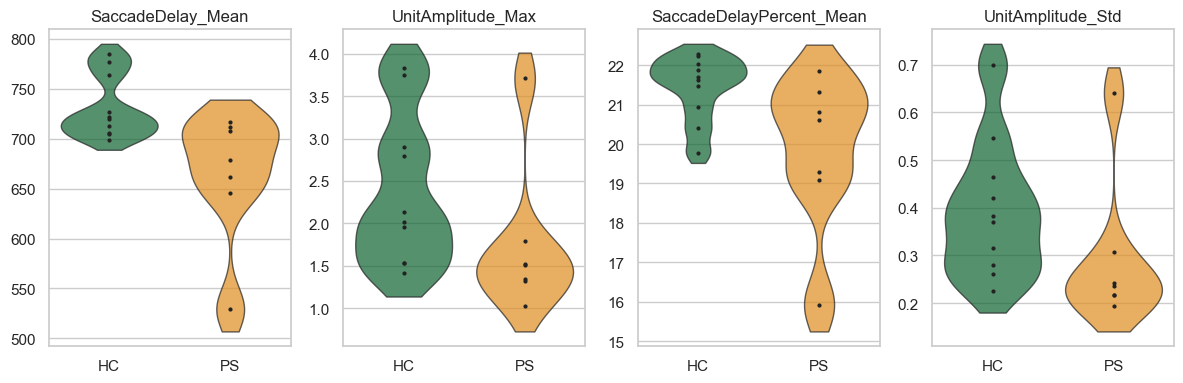

In [13]:
pass_feas = like_pt_res[like_pt_res["if_para"]]
_ncols = 4 
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    try:
        temp_ax = axs[idx//_ncols, idx%_ncols]
    except:
        temp_ax = axs[idx%_ncols]

    sns.violinplot(
            data=like.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig("p_like_sig_features.png", dpi=200)

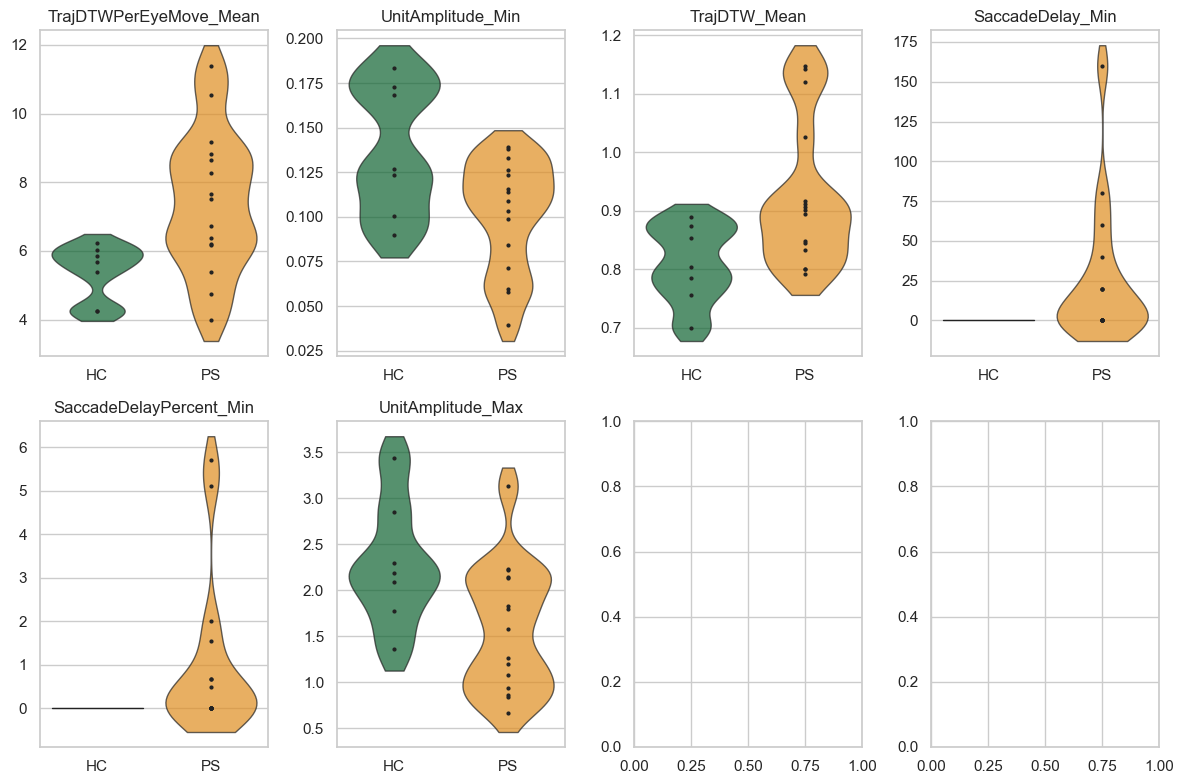

In [14]:
pass_feas = unlike_pt_res[unlike_pt_res["if_para"]]
_ncols = 4 
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    try:
        temp_ax = axs[idx//_ncols, idx%_ncols]
    except:
        temp_ax = axs[idx%_ncols]

    sns.violinplot(
            data=unlike.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig("p_unlike_sig_features.png", dpi=200)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, auc, roc_curve
from lightgbm import LGBMClassifier


# temp_fea = unlike
# temp_sig_fea = unlike_pt_res
# like_type = "unlike"
temp_fea = like
temp_sig_fea = like_pt_res
like_type = "like"

data_indices = temp_fea.index.to_list()
fea_list = temp_sig_fea[temp_sig_fea["if_para"]].index.to_list()
final_result = {}

rkf = RepeatedKFold(n_splits=5, n_repeats=3)
X = temp_fea[fea_list]
y = temp_fea['label']

In [21]:
final_result['overall'] = {}
final_result['overall']['acc'] = []
final_result['overall']['pre'] = []
final_result['overall']['recall'] = []
final_result['overall']['f1'] = []
final_result['overall']['fpr'] = []
final_result['overall']['tpr'] = []
final_result['overall']['thresholds'] = []
final_result['overall']['auc'] = []
final_result['overall']['test_index'] = []
final_result['overall']['trues'] = []
final_result['overall']['preds'] = []
final_result['overall']['preds_porb'] = []

for i, (train_index, test_index) in enumerate(rkf.split(X)):
    final_result['overall']['test_index'].append(test_index.tolist())

    # cls = RandomForestClassifier(20, max_depth=5)
    cls = RandomForestClassifier(n_estimators=20, max_depth=5)
    # cls = AdaBoostClassifier(n_estimators=5, learning_rate=0.75)
    # cls = SVC(C=0.75, kernel='linear')
    # cls = SVC(C=0.75, kernel='rbf')
    x_train, y_train = temp_fea.iloc[train_index][fea_list], temp_fea.iloc[train_index]['label']
    x_test, y_test = temp_fea.iloc[test_index][fea_list], temp_fea.iloc[test_index]['label']
    cls.fit(X=x_train, y=y_train)

    pred = cls.predict(x_test)
    final_result['overall']['acc'].append(accuracy_score(y_test, pred))
    final_result['overall']['pre'].append(precision_score(y_test, pred))
    final_result['overall']['recall'].append(recall_score(y_test, pred))
    final_result['overall']['f1'].append(f1_score(y_test, pred))
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    final_result['overall']['fpr'].append(fpr)
    final_result['overall']['tpr'].append(tpr)
    final_result['overall']['thresholds'].append(thresholds)
    final_result['overall']['auc'].append(auc(fpr, tpr))

    final_result['overall']['trues'].append(y_test.to_list())
    final_result['overall']['preds'].append(pred.tolist())
    final_result['overall']['preds_porb'].append(cls.predict_proba(x_test).tolist())

In [22]:
stat = pd.DataFrame(final_result["overall"])

best_acc=0
best_indices = []
for indices in np.array(stat.index).reshape(-1, 5):
    _acc = stat.iloc[indices.tolist(),:]["acc"].mean()
    if _acc > best_acc:
        best_acc = _acc
        best_indices = indices
# stat.iloc[best_indices, :].to_dict('list')

In [23]:
# final_result["overall"] = stat.iloc[best_indices, :].to_dict('list')

In [24]:
from sklearn.metrics import roc_auc_score

trues = [item for sublist in final_result["overall"]["trues"] for item in sublist]
preds = [item for sublist in final_result["overall"]["preds"] for item in sublist]
preds_prob = [item[1] for sublist in final_result["overall"]["preds_porb"] for item in sublist]

with open(f"{ball_type}_{like_type}_report.txt", "w") as f:
    for key in final_result['overall'].keys():
        if key in ['fpr', 'tpr', 'thresholds', 'test_index', 'trues', 'preds', 'preds_porb']:
            continue
        f.write("{} : {}\n".format(key, np.mean(final_result['overall'][key])))
    f.write("AUC : {}".format(roc_auc_score(trues, preds_prob)))